Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14907
           1       0.71      0.63      0.67      8971

    accuracy                           0.77     23878
   macro avg       0.75      0.74      0.74     23878
weighted avg       0.76      0.77      0.76     23878

Confusion Matrix:


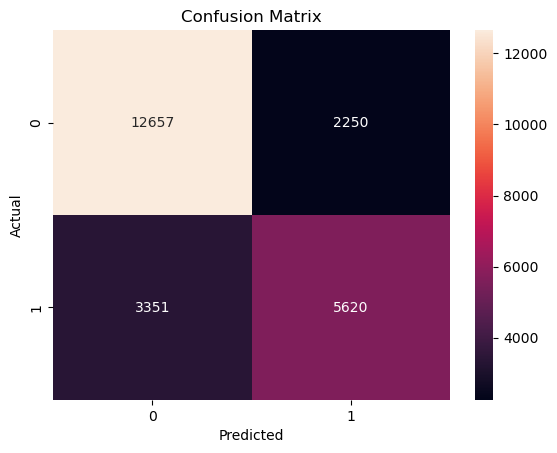

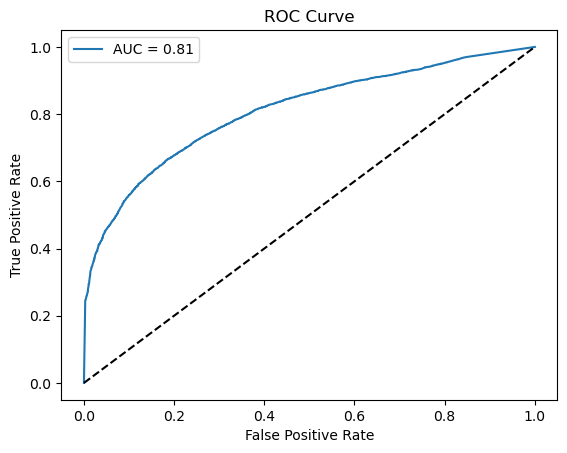

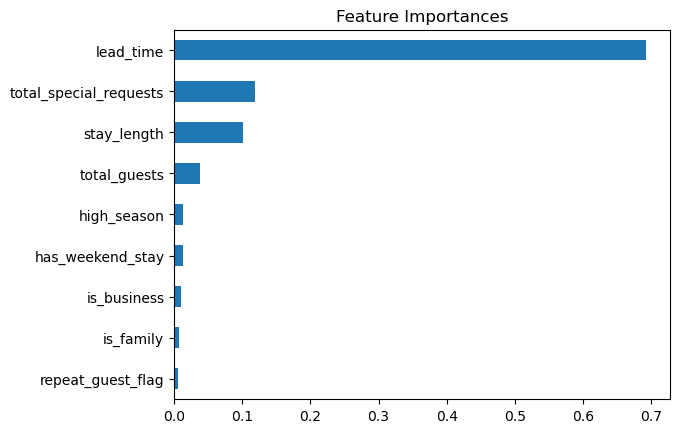

In [9]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 2️⃣ Load the cleaned data
df = pd.read_csv(r"C:\Users\arysh\projectHotel\cleaned_data.csv")

# 3️⃣ Select features
features = [
    'lead_time',
    'stay_length',
    'total_guests',
    'is_family',
    'high_season',
    'total_special_requests',
    'is_business',
    'has_weekend_stay',
    'repeat_guest_flag'
]
X = df[features]
y = df['is_canceled']

# 4️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 7️⃣ Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 8️⃣ Feature Importances
importances = pd.Series(model.feature_importances_, index=features).sort_values()
importances.plot(kind='barh', title='Feature Importances')
plt.show()
